In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
from os.path import join
import os
import random
from functools import partial
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Reshape, concatenate
from keras.optimizers import Nadam
from keras.layers.advanced_activations import ELU
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.backend import binary_crossentropy
import ntpath

import tensorflow as tf

K.clear_session()
K.set_image_dim_ordering('tf')

print(K.image_data_format())
smooth = 1e-12
num_examples = 0

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


channels_last


In [21]:

def jaccard_coef(y_true, y_pred):
    intersection = K.sum(y_true * y_pred, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)


def jaccard_coef_int(y_true, y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))

    intersection = K.sum(y_true * y_pred_pos, axis=[0, -1, -2])
    sum_ = K.sum(y_true + y_pred_pos, axis=[0, -1, -2])

    jac = (intersection + smooth) / (sum_ - intersection + smooth)

    return K.mean(jac)


def jaccard_coef_loss(y_true, y_pred):
    return -K.log(jaccard_coef(y_true, y_pred)) + binary_crossentropy(y_pred, y_true)



In [22]:
def preprocess_old(image, gray):
    mask = np.ones((512,512), dtype="uint8") * 255
    nu=0
    _, contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for i, c in enumerate(contours):
        area = int(cv2.contourArea(c))
        if area <10:
            
            if nu<1:
                print(area)
                nu=nu+1
                cv2.drawContours(mask, [c], -1, 0, -1)
    image = cv2.bitwise_and(image, image, mask=mask)
    return image

In [27]:
def preprocess(image, gray):
    ret, gray = cv2.threshold(gray, 250, 255,0)
    imageha, contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    largest_areas = sorted(contours, key=cv2.contourArea)
    #x,y,w,h = cv2.boundingRect(largest_areas[-1])
    mask = np.zeros((512,512),dtype= np.uint8)
    cv2.drawContours(mask, [largest_areas[-1]], 0, (126,211,33,255), -1)
    image = cv2.bitwise_and(image, image, mask=mask)
    return image

In [24]:
model = load_model('modeltr.h5', custom_objects={'jaccard_coef_int': jaccard_coef_int,'jaccard_coef_loss': jaccard_coef_loss})

In [ ]:
import glob
count=0
image_size = 512
orig_path = "masks/generate_train/batch1/*"
mask_path = "masks/generate_output/batch1/"
#output_mask_path = "masks/output/"
orig = glob.glob(orig_path)
temp = orig[:48]
for fl in temp:
    orig_images = cv2.imread(fl)
    orig_images = cv2.resize(orig_images, (512, 512))
    image = np.expand_dims(orig_images, axis=0)
    mpo = model.predict(image)
    a = np.uint8(mpo*255)
    a = a.reshape(512,512,3)
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    output_mask = preprocess(a, gray)
    fig = plt.figure(figsize=(50, 50))
    columns = 2
    rows = 1
    count= count+1
    basenm = ntpath.basename(fl)
    nm_output_mask = mask_path+basenm
    tite=fl+"Image No:"+ str(count)
    fig.add_subplot(rows, columns, 1)
    plt.imshow(orig_images)
    fig.add_subplot(rows, columns, 2)
    #res = cv2.bitwise_and(orig_images, output_mask)
    plt.imshow(output_mask)
    plt.title(tite,fontsize=26)
    plt.show()


In [ ]:
#BAtch 2 of images
#output_mask_path = "masks/output/"
orig = glob.glob(orig_path)
temp1 = orig[48:96]
for fl in temp1:
    orig_images = cv2.imread(fl)
    orig_images = cv2.resize(orig_images, (512, 512))
    image = np.expand_dims(orig_images, axis=0)
    mpo = model.predict(image)
    a = np.uint8(mpo*255)
    a = a.reshape(512,512,3)
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    output_mask = preprocess(a, gray)
    fig = plt.figure(figsize=(50, 50))
    columns = 2
    rows = 1
    count= count+1
    basenm = ntpath.basename(fl)
    nm_output_mask = mask_path+basenm
    tite=fl+"Image No:"+ str(count)
    fig.add_subplot(rows, columns, 1)
    plt.imshow(orig_images)
    fig.add_subplot(rows, columns, 2)
    #res = cv2.bitwise_and(orig_images, output_mask)
    plt.imshow(output_mask)
    plt.title(tite,fontsize=26)
    plt.show()


In [ ]:
#BAtch 3 of images
#output_mask_path = "masks/output/"
count=0
orig = glob.glob(orig_path)
temp3 = orig[96:]
for fl in temp3:
    orig_images = cv2.imread(fl)
    orig_images = cv2.resize(orig_images, (512, 512))
    image = np.expand_dims(orig_images, axis=0)
    mpo = model.predict(image)
    a = np.uint8(mpo*255)
    a = a.reshape(512,512,3)
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
    output_mask = preprocess(a, gray)
    fig = plt.figure(figsize=(50, 50))
    columns = 2
    rows = 1
    count= count+1
    basenm = ntpath.basename(fl)
    nm_output_mask = mask_path+basenm
    tite=fl+"Image No:"+ str(count)
    fig.add_subplot(rows, columns, 1)
    plt.imshow(orig_images)
    fig.add_subplot(rows, columns, 2)
    #res = cv2.bitwise_and(orig_images, output_mask)
    plt.imshow(output_mask)
    plt.title(tite,fontsize=26)
    plt.show()


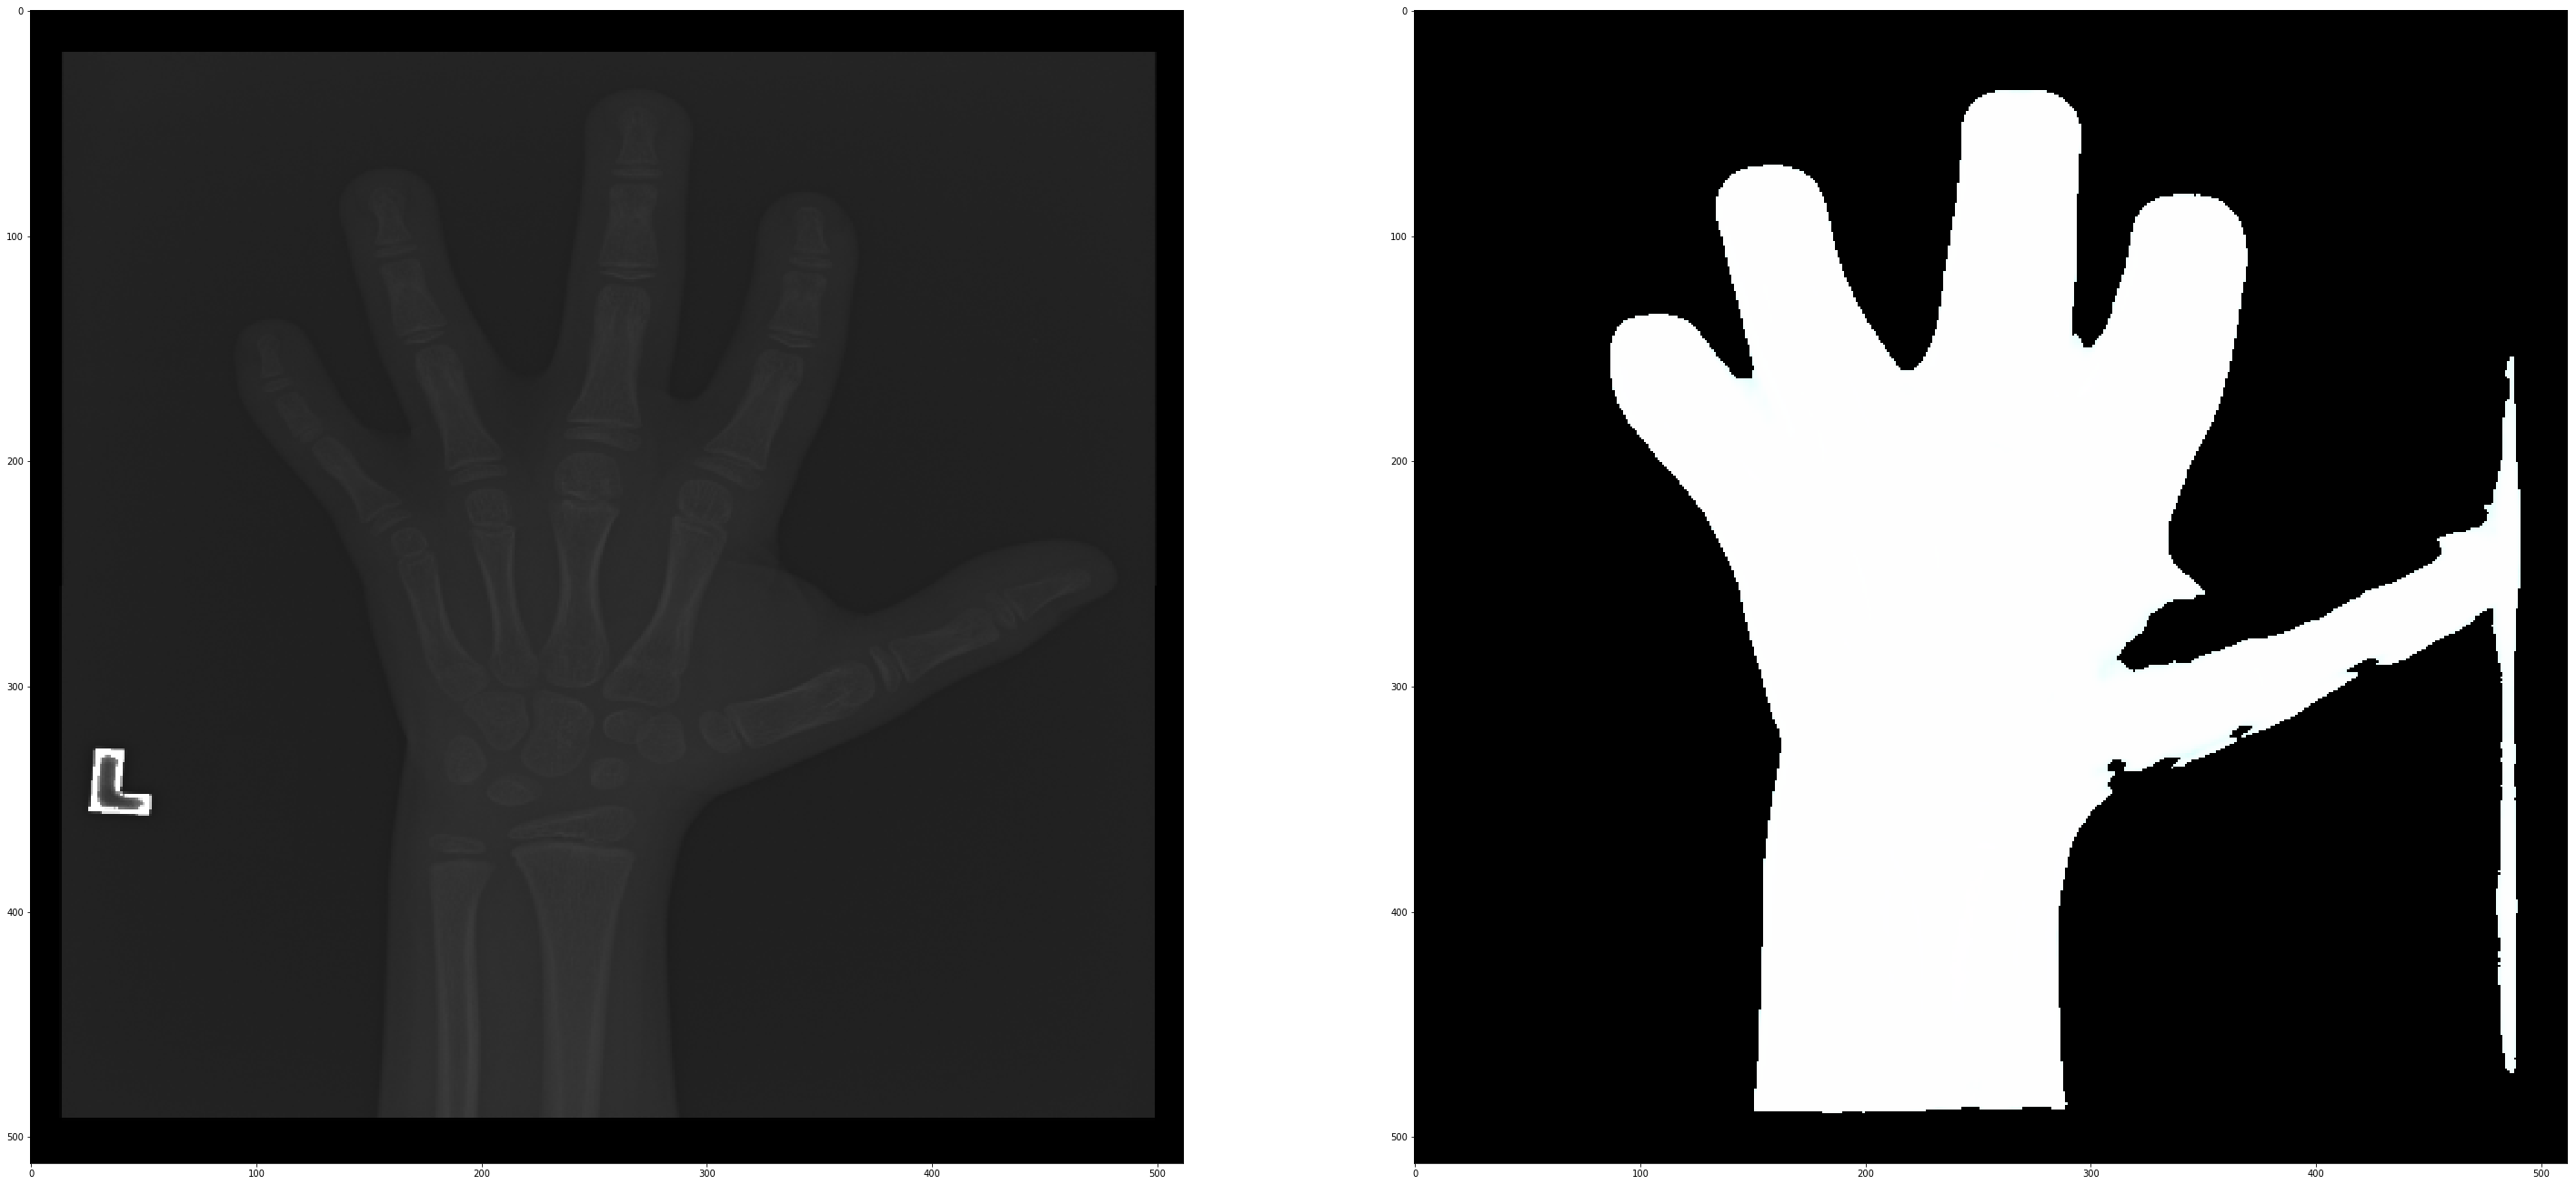

In [35]:
#testing on a single image
orig_images = cv2.imread('4204.png')
orig_images = cv2.resize(orig_images, (512, 512))
image = np.expand_dims(orig_images, axis=0)
mpo = model.predict(image)
a = np.uint8(mpo*255)
a = a.reshape(512,512,3)
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
output_mask = preprocess(a, gray)
fig = plt.figure(figsize=(50, 50))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(orig_images)
fig.add_subplot(rows, columns, 2)
#res = cv2.bitwise_and(orig_images, output_mask)
plt.imshow(output_mask)
plt.show()


In [ ]:
orig_images = cv2.imread('4209.png')
orig_images = cv2.resize(orig_images, (512, 512))
image = np.expand_dims(orig_images, axis=0)
mpo = model.predict(image)
a = np.uint8(mpo*255)
a = a.reshape(512,512,3)
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
ret, gray = cv2.threshold(gray, 250, 255,0)
image, contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
largest_areas = sorted(contours, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(largest_areas[-1])
mask = np.zeros((512,512),dtype= np.uint8)
cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
image = cv2.bitwise_and(orig_images, orig_images, mask=mask)
#cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

roi=image[y-20:y+h+20,x-20:x+w+20]

roi=cv2.resize(roi,(512,512))

fig = plt.figure(figsize=(50, 50))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(orig_images)
fig.add_subplot(rows, columns, 2)
    #res = cv2.bitwise_and(orig_images, output_mask)
plt.imshow(roi)
plt.show()

In [ ]:
len(orig)

In [ ]:
pat="/home/ubuntu/research/masks/training/masks/*"
orig = glob.glob(pat)
orig.sort()
    
    

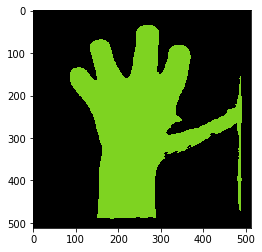

In [43]:
lower_black = np.array([220,220,220], dtype = "uint16")
upper_black = np.array([255,255,255], dtype = "uint16")
black_mask = cv2.inRange(output_mask, lower_black, upper_black)
backtorgb = cv2.cvtColor(black_mask,cv2.COLOR_GRAY2RGB)
backtorgb[np.where((backtorgb==[255,255,255]).all(axis=2))] = [126,211,33]

plt.imshow(backtorgb)
plt.show()


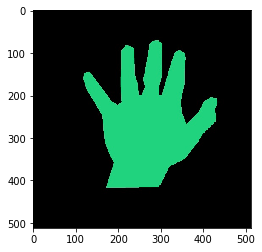

In [14]:
import cv2
aas = cv2.imread('1902.jpg')
plt.imshow(aas)
plt.show()

In [17]:
print(sorted(set( tuple(v) for m2d in aas for v in m2d )))

[(0, 0, 0), (0, 0, 1), (0, 0, 3), (0, 0, 4), (0, 0, 5), (0, 0, 6), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 5), (0, 2, 6), (0, 3, 0), (0, 3, 1), (0, 3, 2), (0, 3, 3), (0, 3, 4), (0, 3, 6), (0, 3, 7), (0, 3, 8), (0, 4, 0), (0, 4, 1), (0, 4, 2), (0, 4, 3), (0, 4, 4), (0, 4, 5), (0, 5, 0), (0, 5, 1), (0, 5, 2), (0, 5, 3), (0, 5, 4), (0, 6, 0), (0, 6, 1), (0, 6, 3), (0, 6, 4), (0, 6, 5), (0, 6, 6), (0, 7, 0), (0, 7, 1), (0, 7, 2), (0, 7, 3), (0, 8, 0), (0, 8, 1), (0, 8, 4), (0, 8, 6), (0, 9, 0), (0, 9, 1), (0, 9, 2), (0, 9, 3), (0, 9, 5), (0, 10, 0), (0, 10, 2), (0, 10, 5), (0, 11, 0), (0, 11, 2), (0, 11, 3), (0, 11, 4), (0, 12, 0), (0, 12, 2), (0, 13, 0), (0, 14, 0), (0, 15, 0), (0, 16, 0), (0, 16, 1), (0, 17, 0), (0, 17, 1), (0, 18, 0), (0, 19, 0), (0, 20, 0), (0, 21, 0), (0, 22, 0), (0, 23, 0), (0, 24, 0), (0, 25, 0), (0, 26, 0), (0, 27, 0), (0, 28, 0), (0, 29, 0), (0, 30, 0), (0, 31, 0), (0, 32, 0), (0, 32, 5),

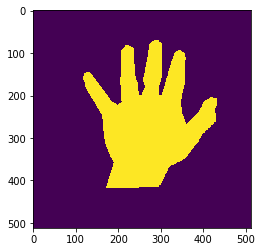

In [21]:
lower_black = np.array([10,10,10], dtype = "uint16")
upper_black = np.array([255,255,255], dtype = "uint16")
black_mask = cv2.inRange(aas, lower_black, upper_black)
plt.imshow(black_mask)
plt.show()


In [22]:
black_mask.shape

(512, 512)

In [26]:
backtorgb = cv2.cvtColor(black_mask,cv2.COLOR_GRAY2BGR)

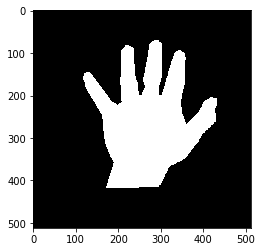

In [27]:
plt.imshow(backtorgb)
plt.show()

In [28]:
backtorgb

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)